In [1]:
import pandas as pd

data = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
# Import necessary library
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv') 

# Get descriptive statistics
descriptive_stats = data.describe()

# Display the descriptive statistics
print(descriptive_stats)


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

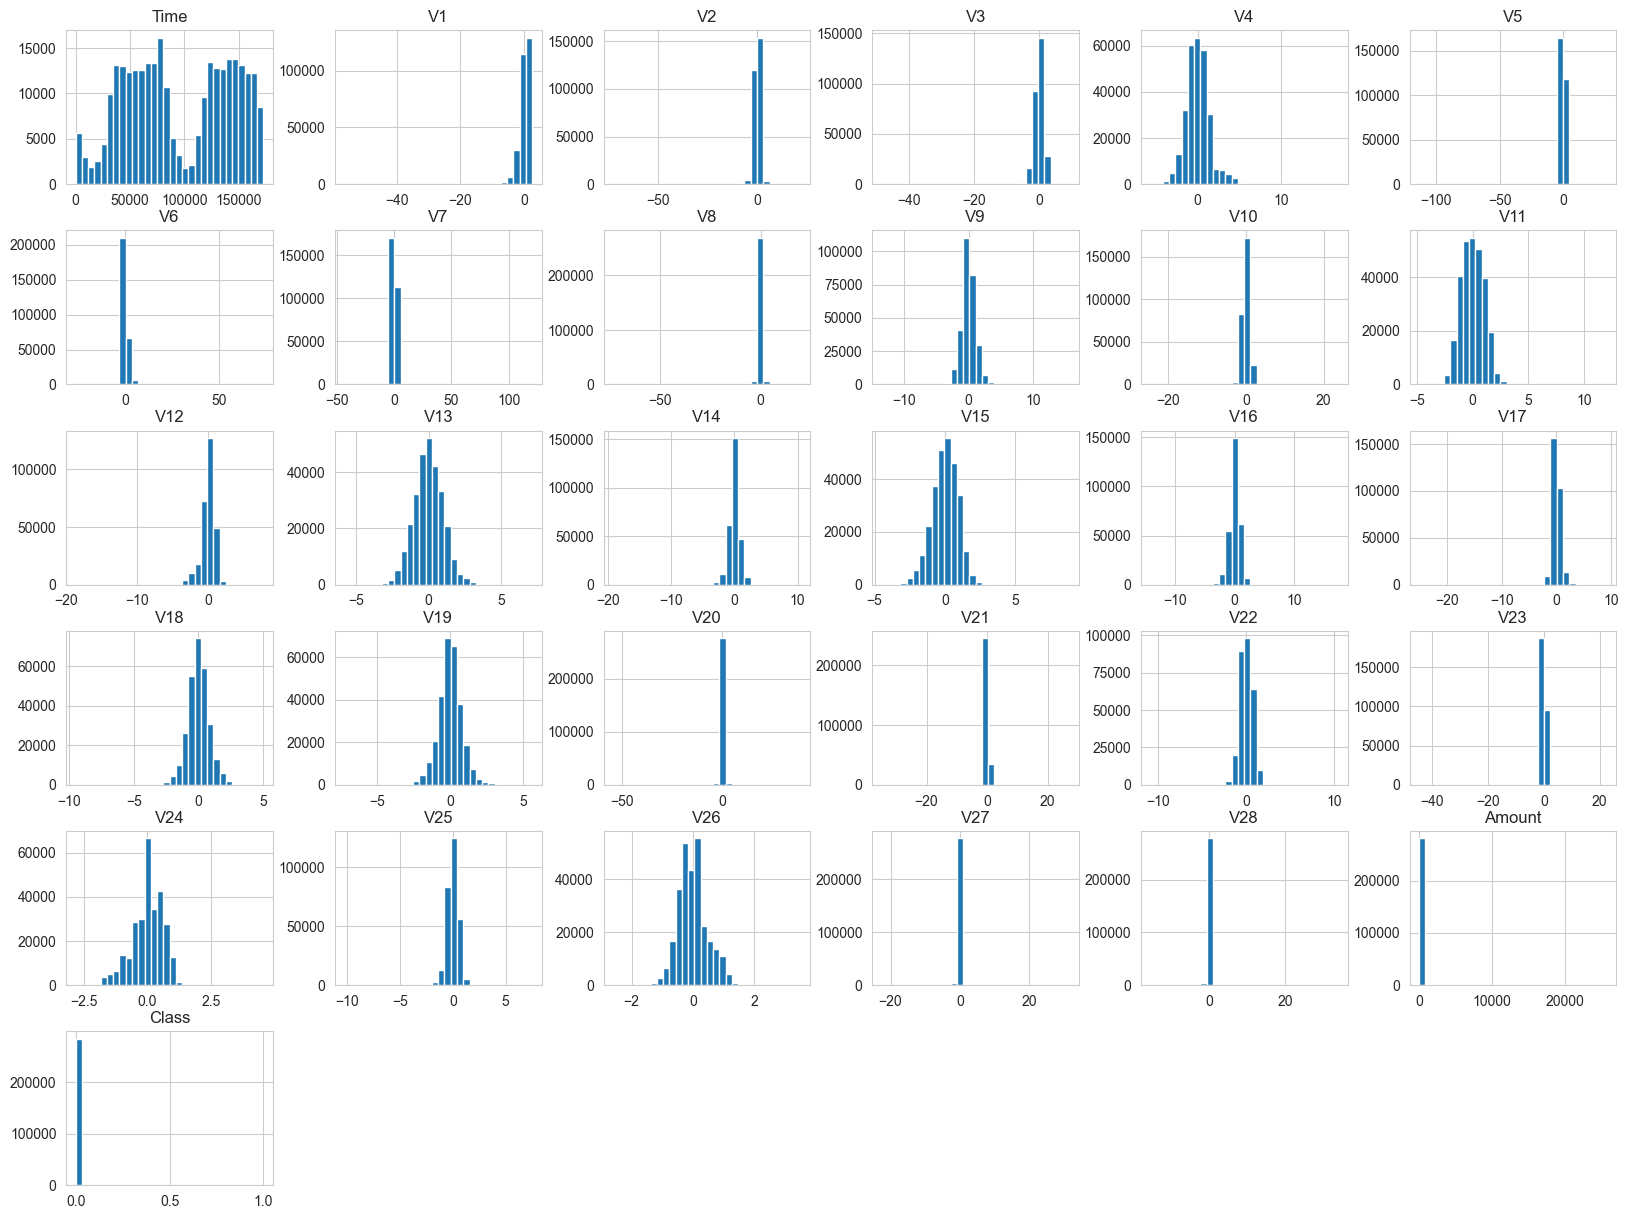

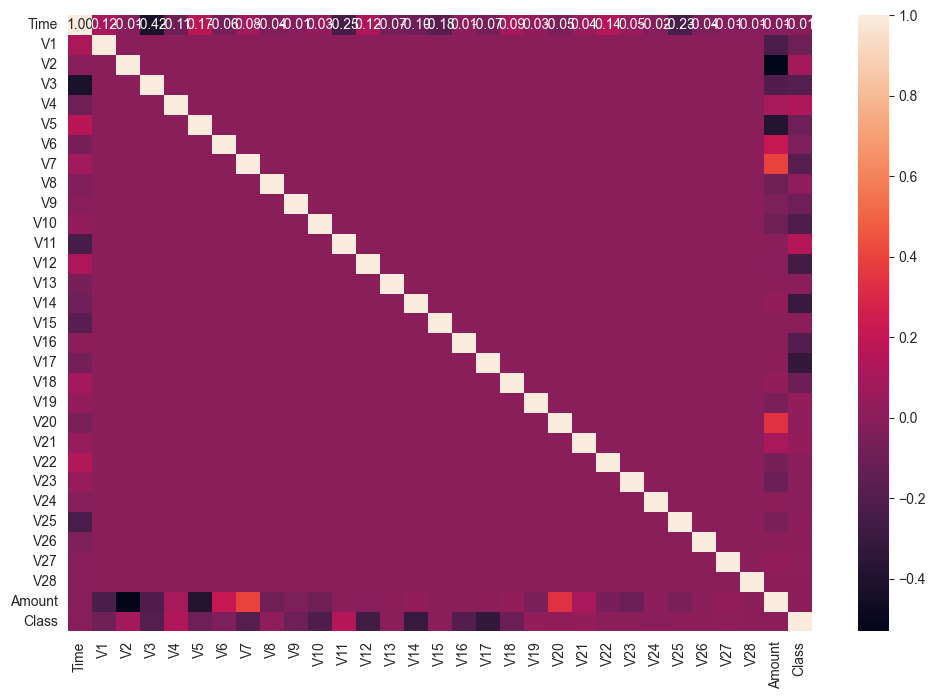

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot histograms for each feature
data.hist(bins=30, figsize=(20, 15))
plt.show()

# Plot a correlation heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()


In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Check for duplicate entries
duplicates = data.duplicated().sum()

# Display missing values and duplicates
print(f'Missing Values:\n{missing_values}\n')
print(f'Duplicates: {duplicates}')


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Duplicates: 1081


In [7]:
# Example code
from sklearn.preprocessing import StandardScaler

# Assuming 'Amount' is a feature in your dataset
data['Normalized_Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))
data.drop(['Amount'], axis=1, inplace=True)


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['Class'], axis=1)  # Assuming 'Class' is the target variable
y = data['Class']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [9]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions on validation data
y_val_pred = rf_classifier.predict(X_val)

# Evaluation
print(f'Accuracy: {accuracy_score(y_val, y_val_pred)}')
print(f'Precision: {precision_score(y_val, y_val_pred)}')
print(f'Recall: {recall_score(y_val, y_val_pred)}')
print(f'F1 Score: {f1_score(y_val, y_val_pred)}')


Accuracy: 0.9995318461646497
Precision: 0.9672131147540983
Recall: 0.7662337662337663
F1 Score: 0.855072463768116


# **Real Time Simulation**

In [1]:
from azure.eventhub import EventHubProducerClient, EventData
import time
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Create an Event Hub client
# Create an Event Hub client
producer = EventHubProducerClient.from_connection_string(
    conn_str='Endpoint=sb://realtimefrauddetectionehns.servicebus.windows.net/;SharedAccessKeyName=RootManageSharedAccessKey;SharedAccessKey=nQxuII2uOqnM20hIz4/NGlzEQaf35pMEW+AEhFRLlMc=',
    eventhub_name='realtimefrauddetectionev'
)


# Simulate real-time data streaming
for index, row in data.iterrows():
    batch = producer.create_batch()
    event_data = EventData(body=row.to_json())
    batch.add(event_data)
    producer.send_batch(batch)
    time.sleep(1)  # Adjust the sleep time to control the streaming rate


KeyboardInterrupt: 

In [2]:
from azure.eventhub import EventHubProducerClient, EventData
import time
import pandas as pd
import re
from datetime import datetime

def clean_text(text):
    if pd.isnull(text):
        return text
    text = re.sub(r'[\"\\]', '', text)  # Removing quotes and backslashes
    text = re.sub(r'\s+', ' ', text)    # Replacing multiple spaces with a single space
    return text

# Define the function to format datetime
def format_datetime(dt_str):
    try:
        # Parsing and formatting the datetime
        dt = datetime.strptime(dt_str, "%Y-%m-%d %H:%M:%S")
        return dt.strftime("%Y-%m-%dT%H:%M:%SZ")  # Formatting as ISO 8601 string
    except ValueError:
        return dt_str  # Returning original string if parsing fails

# Load the dataset
data = pd.read_csv('creditcard.csv')


# Create an Event Hub client
producer = EventHubProducerClient.from_connection_string(
    conn_str='Endpoint=sb://frauddetectionversion2.servicebus.windows.net/;SharedAccessKeyName=PythonAccessPolicy;SharedAccessKey=LBZ/6NVIhuOIGs5r0+4GY6QpjpMDQqbqZ+AEhK/wYUY=',
    eventhub_name='fraudpython'
)

# Simulate real-time data streaming
for index, row in data.iterrows():
    json_row = row.to_json()
    print(f"JSON Row {index}: {json_row}")  # Printing the JSON row to the console
    
    batch = producer.create_batch()
    event_data = EventData(body=json_row)
    batch.add(event_data)
    producer.send_batch(batch)
    time.sleep(1)  # Adjust the sleep time to control the streaming rate


JSON Row 0: {"Time":0.0,"V1":-1.3598071337,"V2":-0.0727811733,"V3":2.536346738,"V4":1.3781552243,"V5":-0.3383207699,"V6":0.4623877778,"V7":0.2395985541,"V8":0.0986979013,"V9":0.3637869696,"V10":0.090794172,"V11":-0.5515995333,"V12":-0.6178008558,"V13":-0.9913898472,"V14":-0.3111693537,"V15":1.4681769721,"V16":-0.4704005253,"V17":0.2079712419,"V18":0.0257905802,"V19":0.4039929603,"V20":0.2514120982,"V21":-0.0183067779,"V22":0.2778375756,"V23":-0.1104739102,"V24":0.0669280749,"V25":0.1285393583,"V26":-0.1891148439,"V27":0.1335583767,"V28":-0.0210530535,"Amount":149.62,"Class":0.0}
JSON Row 1: {"Time":0.0,"V1":1.1918571113,"V2":0.2661507121,"V3":0.1664801134,"V4":0.4481540785,"V5":0.0600176493,"V6":-0.0823608088,"V7":-0.0788029833,"V8":0.0851016549,"V9":-0.2554251281,"V10":-0.166974414,"V11":1.6127266611,"V12":1.0652353114,"V13":0.4890950159,"V14":-0.1437722964,"V15":0.6355580933,"V16":0.463917041,"V17":-0.1148046631,"V18":-0.1833612701,"V19":-0.1457830413,"V20":-0.0690831352,"V21":-0.225

KeyboardInterrupt: 